In [1]:
# 1. 导入库及读取数据
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统黑体
plt.rcParams['axes.unicode_minus'] = False    # 修复负号显示

df = pd.read_csv("../sj/US-pumpkins.csv")  # 以pandas库的read_csv函数读取csv文件
df.head()  # 查看前5行数据

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# 2. 数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [3]:
# 3.缺失值检查
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
# 4.一致性检查
# 发现南瓜的包装方式（称量单位）不统一
print(df["Package"].is_unique)    # False
print(set(df["Package"].tolist()))

False
{'bushel cartons', 'bins', '20 lb cartons', '24 inch bins', '40 lb cartons', 'each', 'bushel baskets', '1 1/9 bushel crates', '35 lb cartons', '50 lb cartons', '1 1/9 bushel cartons', '1/2 bushel cartons', '36 inch bins', '22 lb cartons', '50 lb sacks'}


'20 lb cartons', '1 1/9 bushel crates', '40 lb cartons', 'bushel baskets', '22 lb cartons', 'bushel cartons', '50 lb cartons', '1/2 bushel cartons', '24 inch bins', '35 lb cartons', '36 inch bins', 'each', '1 1/9 bushel cartons', 'bins', '50 lb sacks'

'20 磅纸箱'， '1 1/9 蒲式耳纸箱'， '40 磅纸箱'， '蒲式耳篮'， '22 磅纸箱'， '蒲式耳纸箱'， '50 磅纸箱'， '1/2 蒲式耳纸箱'， '24 英寸箱子'， '35 磅纸箱'， '36 英寸箱子'， '每个'， '1 1/9 蒲式耳纸箱'， '箱子'， '50 磅麻袋'

In [5]:
# 提取本次研究所需要的有价值的特征和标签
features = ['Date', 'City Name', 'Origin', 'Variety', 'Package', 'Low Price', 'High Price']
data = df[features]
print(len(data))    # 1757
print(data.head().to_string())

1757
      Date  City Name    Origin      Variety       Package  Low Price  High Price
0  4/29/17  BALTIMORE  MARYLAND          NaN  24 inch bins      270.0       280.0
1   5/6/17  BALTIMORE  MARYLAND          NaN  24 inch bins      270.0       280.0
2  9/24/16  BALTIMORE  DELAWARE  HOWDEN TYPE  24 inch bins      160.0       160.0
3  9/24/16  BALTIMORE  VIRGINIA  HOWDEN TYPE  24 inch bins      160.0       160.0
4  11/5/16  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch bins       90.0       100.0


In [6]:
# 5.过滤缺失值
# 过滤含有空值的数据
data.dropna(axis=0, how='any', inplace=True)
print(len(data))     # 1752

1749


In [7]:
data.drop_duplicates().shape

(1455, 7)

In [8]:
# 6.数据提取与转化
# 提取月份
data['Month'] = data['Date'].apply(lambda dt: pd.to_datetime(dt).month)
print(data.head().to_string())

# 销售日期转化为该年中的第几天
data['DayOfYear'] = data['Date'].apply(lambda dt: pd.to_datetime(dt).timetuple().tm_yday)
print(data.head().to_string())

# 计算南瓜的平均价格作为标签
data['Price'] = (data['Low Price'] + data['High Price']) / 2
print(data.head().to_string())

       Date  City Name    Origin      Variety       Package  Low Price  High Price  Month
2   9/24/16  BALTIMORE  DELAWARE  HOWDEN TYPE  24 inch bins      160.0       160.0      9
3   9/24/16  BALTIMORE  VIRGINIA  HOWDEN TYPE  24 inch bins      160.0       160.0      9
4   11/5/16  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch bins       90.0       100.0     11
5  11/12/16  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch bins       90.0       100.0     11
6   9/24/16  BALTIMORE  MARYLAND  HOWDEN TYPE  36 inch bins      160.0       170.0      9
       Date  City Name    Origin      Variety       Package  Low Price  High Price  Month  DayOfYear
2   9/24/16  BALTIMORE  DELAWARE  HOWDEN TYPE  24 inch bins      160.0       160.0      9        268
3   9/24/16  BALTIMORE  VIRGINIA  HOWDEN TYPE  24 inch bins      160.0       160.0      9        268
4   11/5/16  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch bins       90.0       100.0     11        310
5  11/12/16  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch b

In [9]:
# 7.数据整理
# 将整理的数据放到新的DataFrame中
new_features = ['Month', 'DayOfYear', 'City Name', 'Origin', 'Variety', 'Package', 'Price']
new_pumpkins = data[new_features].reset_index(drop='index')
print(len(new_pumpkins))    # 共1752条数据

# 删除包含空值的行
new_pumpkins.dropna(inplace=True)
print(len(new_pumpkins))    # 1752
print(new_pumpkins.head().to_string())

1749
1749
   Month  DayOfYear  City Name    Origin      Variety       Package  Price
0      9        268  BALTIMORE  DELAWARE  HOWDEN TYPE  24 inch bins  160.0
1      9        268  BALTIMORE  VIRGINIA  HOWDEN TYPE  24 inch bins  160.0
2     11        310  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch bins   95.0
3     11        317  BALTIMORE  MARYLAND  HOWDEN TYPE  24 inch bins   95.0
4      9        268  BALTIMORE  MARYLAND  HOWDEN TYPE  36 inch bins  165.0


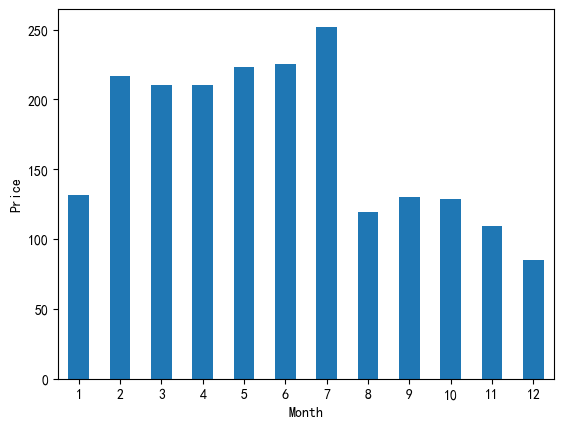

In [10]:
# 8.1 绘制每个月南瓜的平均价格柱状图
new_pumpkins.groupby(by='Month')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Price')
plt.show()

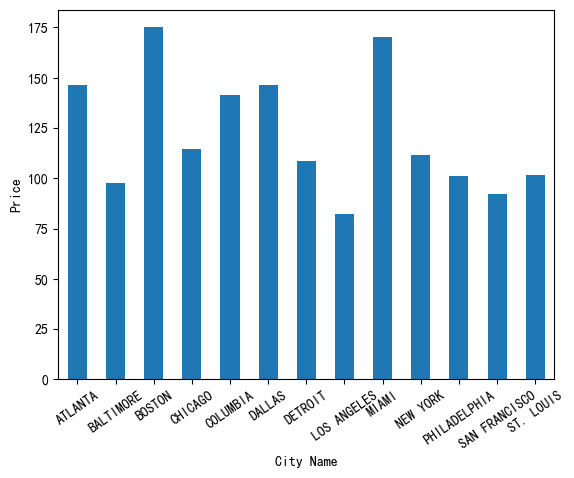

In [11]:
# 8.2 绘制每个城市的南瓜平均价格柱状图
new_pumpkins.groupby(by='City Name')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=35, ha='center')
plt.ylabel('Price')
plt.show()

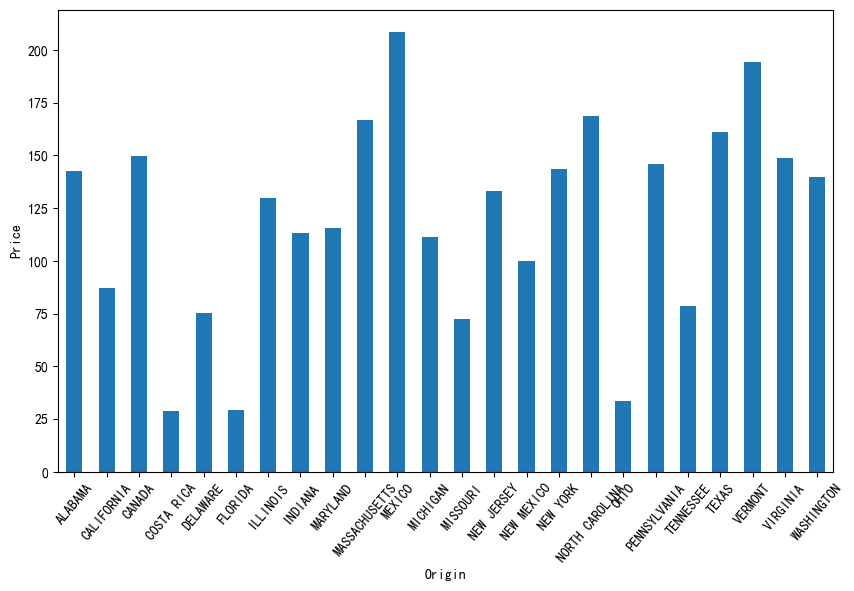

In [12]:
# 8.3 绘制不同原产地的南瓜平均价格柱状图
plt.figure(figsize=(10, 6))
new_pumpkins.groupby(by='Origin')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=50, ha='center')
plt.ylabel('Price')
plt.show()

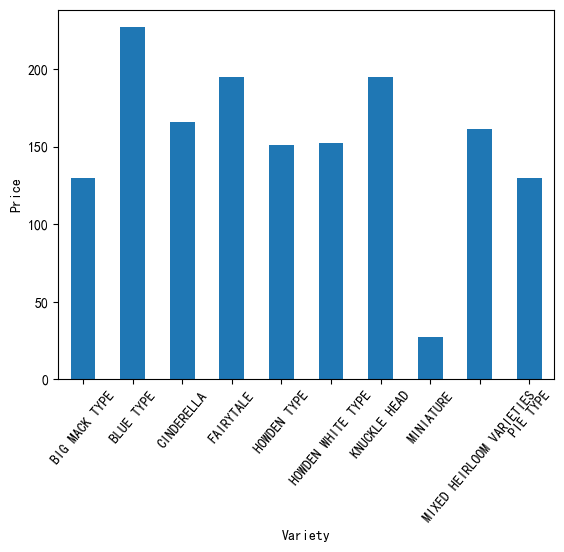

In [13]:
# 8.4 绘制不同品种的南瓜平均价格柱状图
new_pumpkins.groupby(by='Variety')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=50, ha='center')
plt.ylabel('Price')
plt.show()

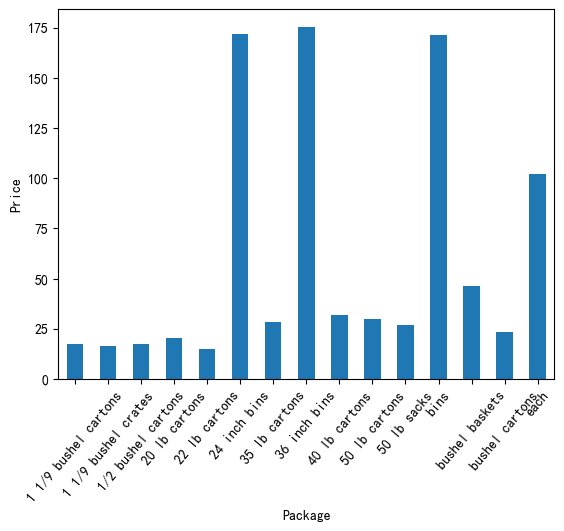

In [14]:
# 8.5 绘制不同包装的南瓜平均价格柱状图
new_pumpkins.groupby(by='Package')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=50, ha='center')
plt.ylabel('Price')
plt.show()

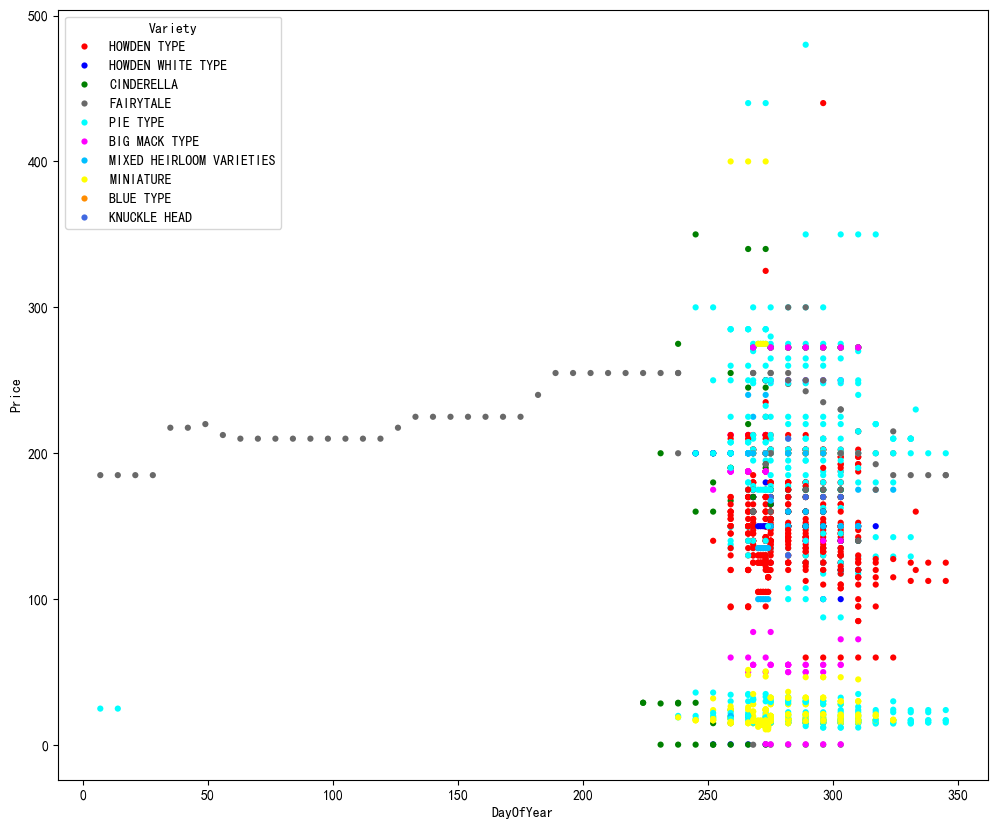

In [15]:
# 8.6 销售日期与价格的散点图，按品种分组着色
# 设置图形大小
plt.figure(figsize=(12, 10))

# 创建颜色映射（确保品种顺序与颜色匹配）
unique_varieties = new_pumpkins['Variety'].unique()
palette = {variety: color for variety, color in zip(unique_varieties, ['red', 'blue', 'green', 'DimGray', 'Cyan', 'Magenta', 'DeepSkyBlue', 'Yellow', 'DarkOrange', 'RoyalBlue'])}

# 使用Seaborn绘制散点图
ax = sns.scatterplot(
    data=new_pumpkins,
    x='DayOfYear',
    y='Price',
    hue='Variety',          # 按品种分组着色
    palette=palette,        # 自定义颜色映射
    edgecolor='none',       # 移除点边缘线
    s=20,                   # 调整点大小
)

# 调整图例位置和标题
ax.legend(title='Variety', loc='best')
plt.show()

In [16]:
# 9.1 简单线性回归实践
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 销售日期-南瓜价格
# 数据格式转换：将输入值（特征变量）和预期的输出值（预测标签）分离到单独的numpy数组中：
X = new_pumpkins['DayOfYear'].to_numpy().reshape(-1, 1)
y = new_pumpkins['Price']

# 划分数据集：将数据集拆分为训练集和测试集，以便在训练后验证模型
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
# 线性回归训练器
lr = LinearRegression()
# 训练线性回归模型
lr.fit(X_train, y_train)

# 回归系数
print("回归系数：", lr.coef_)         
# 截距
print("截距：", lr.intercept_)    
# 模型评估
y_pred = lr.predict(X_test)
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)    
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)        

回归系数： [-0.28214042]
截距： 206.79726746281898
MSE: 6929.920105430603 RMSE: 83.246141684949
相关系数： 0.020369009789893533


In [17]:
# 9.2 南瓜种类-南瓜价格

# 以南瓜的类别作为特征变量，并转化数值类型
# 将南瓜数据被分为4类，每类包含415个样本
X = pd.get_dummies(new_pumpkins['Variety'])
# print(X.info())
y = new_pumpkins['Price']

# 以8:2的比例划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
# 线性回归训练器
lr = LinearRegression()
# 训练线性回归模型
lr.fit(X_train, y_train)
# 将测试集上的预测
y_pred = lr.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)    
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)       

MSE: 4760.647995295445 RMSE: 68.99744919412198
相关系数： 0.32702278832646825


MSE: 1547.0108706356605 RMSE: 39.33205906936046
相关系数： 0.7813106402368195


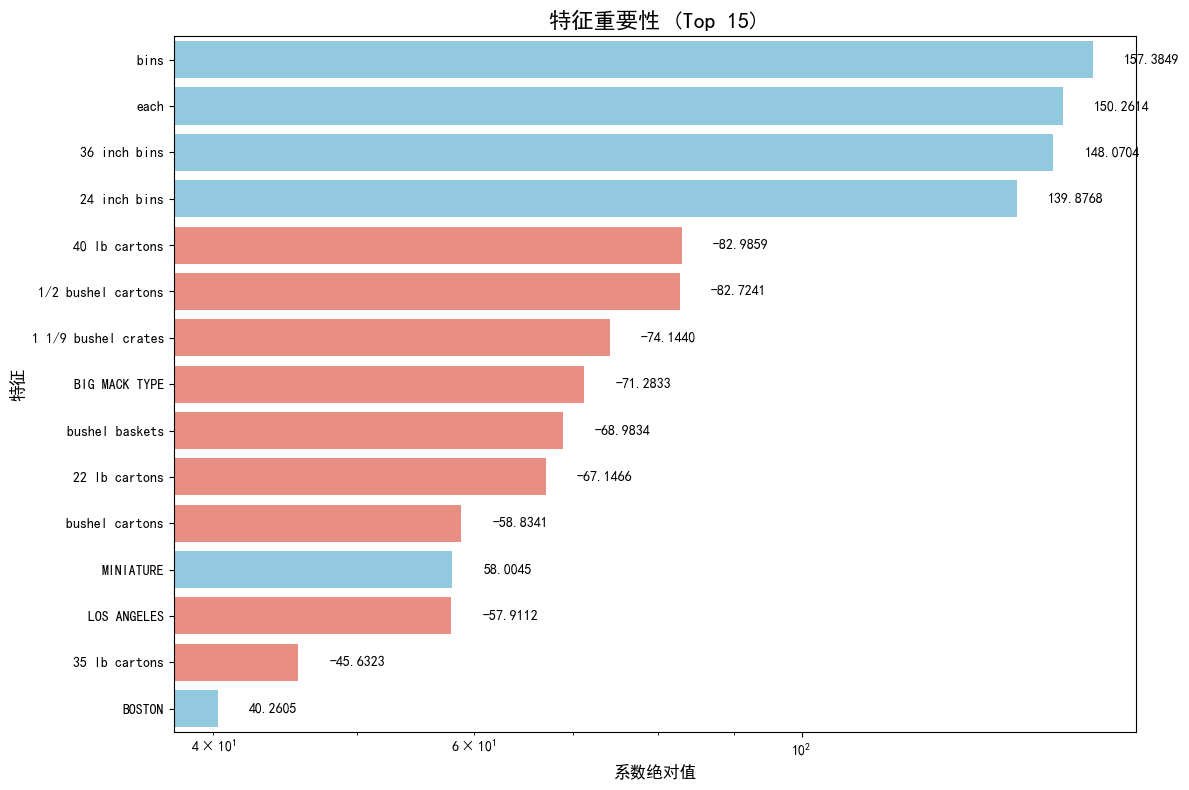

In [18]:
# 10.1 多元线性回归实践
# 整合多个因子（使用南瓜种类、销售日期、销售地区、称量单位四个一阶特征拟合南瓜价格）
X = pd.get_dummies(new_pumpkins['Variety']).join(new_pumpkins['DayOfYear']).join(pd.get_dummies(new_pumpkins['City Name'])).join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
lr = LinearRegression()
lr.fit(X_train, y_train)
# 在测试集上预测
y_pred = lr.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)     
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)        


# 创建特征重要性DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_,
    'Absolute_Coefficient': np.abs(lr.coef_)
})
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# 可视化特征重要性 (水平条形图)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['skyblue' if c > 0 else 'salmon' for c in top_features['Coefficient']]
sns.barplot(x='Absolute_Coefficient', y='Feature', data=top_features, palette=colors)
plt.title('特征重要性 (Top 15)', fontsize=16)
plt.xlabel('系数绝对值', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.xscale('log')  # 使用对数刻度更好显示不同数量级

# 添加系数值标签
for i, (coef, abs_coef) in enumerate(zip(top_features['Coefficient'], top_features['Absolute_Coefficient'])):
    plt.text(abs_coef * 1.05, i, f'{coef:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

最佳正则化参数(alpha): 0.1
MSE: 1548.8147506684468 RMSE: 39.35498380978509
相关系数： 0.7810556392042168


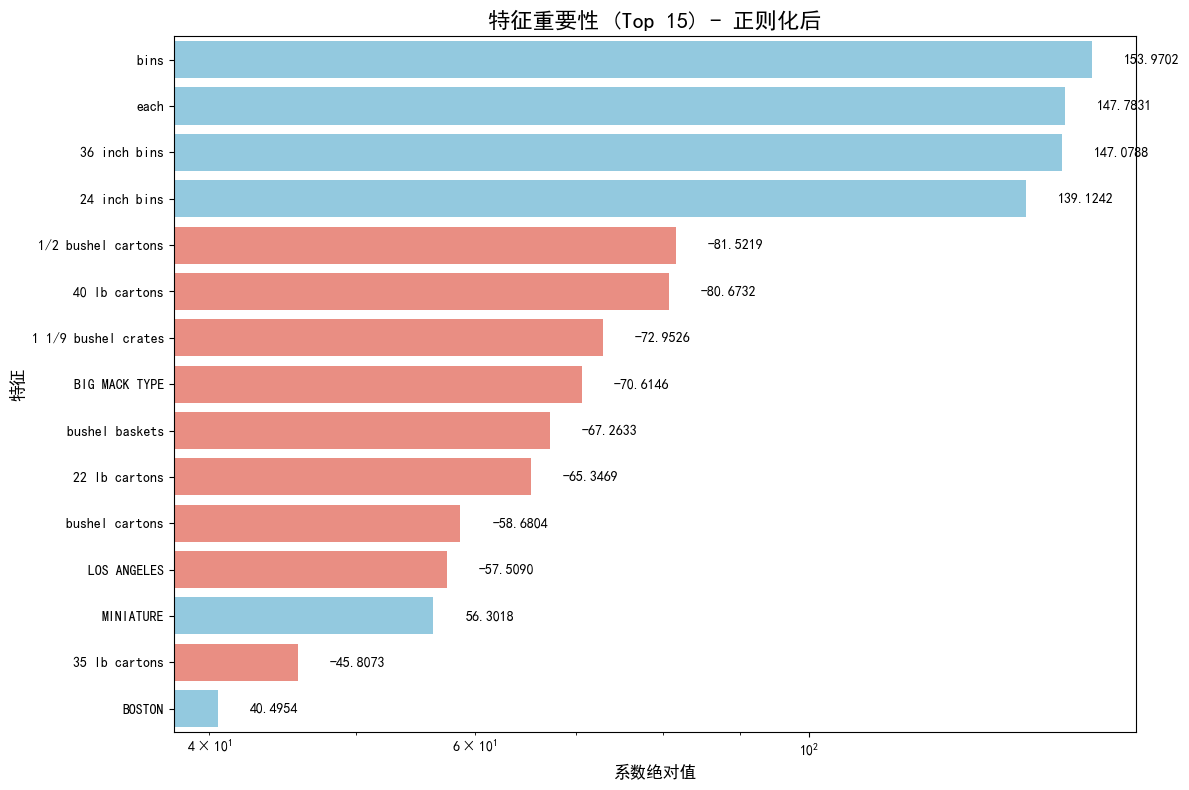

In [20]:
# 10.1 多元线性回归实践（添加正则化防止过拟合）
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 整合多个因子（使用南瓜种类、销售日期、销售地区、称量单位四个一阶特征拟合南瓜价格）
X = pd.get_dummies(new_pumpkins['Variety']).join(new_pumpkins['DayOfYear']).join(pd.get_dummies(new_pumpkins['City Name'])).join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# ===== 添加正则化防止过拟合 =====
# 使用交叉验证选择最佳的正则化参数
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # 正则化强度参数
}

# 创建正则化模型（这里使用岭回归Ridge，也可以使用Lasso）
# Ridge(L2正则化) 或 Lasso(L1正则化)
model = Ridge()

# 网格搜索交叉验证
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_model = grid_search.best_estimator_
print(f"最佳正则化参数(alpha): {best_model.alpha}")

# 在测试集上预测
y_pred = best_model.predict(X_test)
# =============================

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)     
# 计算相关系数
score = best_model.score(X_test, y_test)
print("相关系数：", score)        

# 创建特征重要性DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_,
    'Absolute_Coefficient': np.abs(best_model.coef_)
})
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# 可视化特征重要性 (水平条形图)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['skyblue' if c > 0 else 'salmon' for c in top_features['Coefficient']]
sns.barplot(x='Absolute_Coefficient', y='Feature', data=top_features, palette=colors)
plt.title('特征重要性 (Top 15) - 正则化后', fontsize=16)
plt.xlabel('系数绝对值', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.xscale('log')  # 使用对数刻度更好显示不同数量级

# 添加系数值标签
for i, (coef, abs_coef) in enumerate(zip(top_features['Coefficient'], top_features['Absolute_Coefficient'])):
    plt.text(abs_coef * 1.05, i, f'{coef:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

MSE: 1037.0603241175938 RMSE: 32.203421000222846
相关系数： 0.8533985360918089


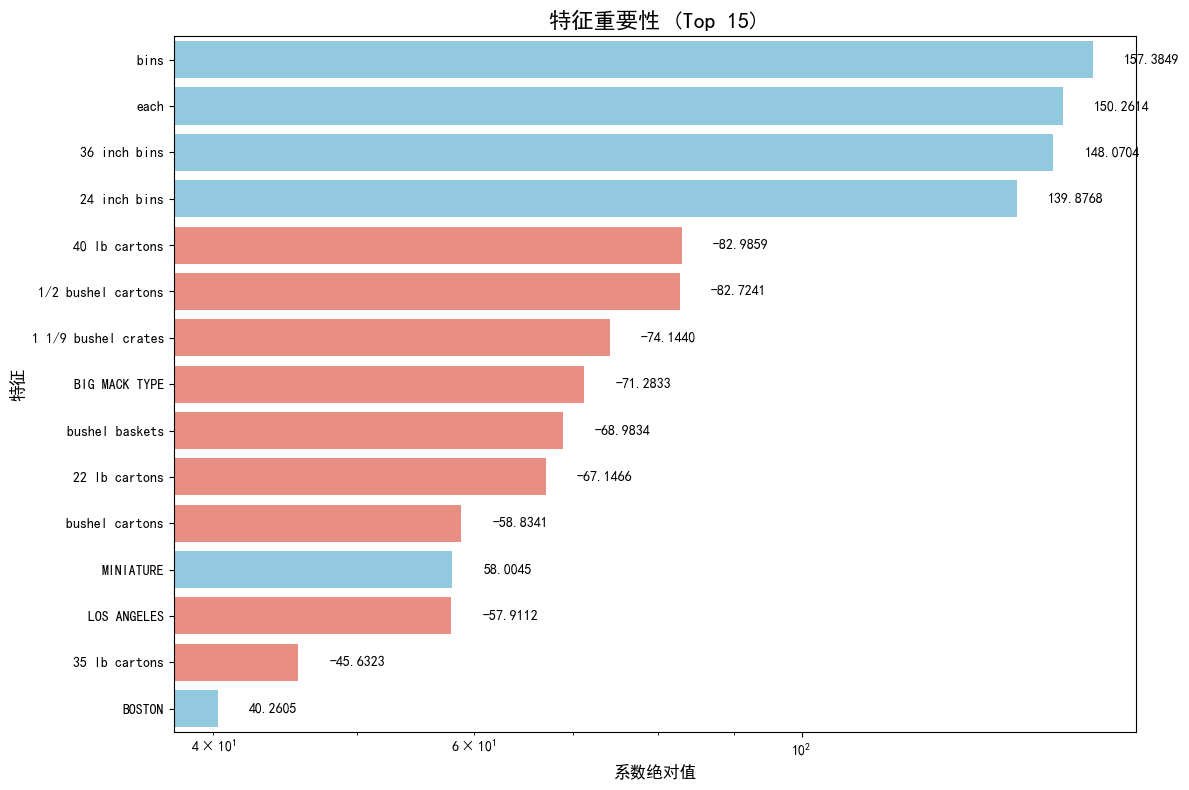

In [21]:
# 10.2 多元线性回归（多项式）
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 使用南瓜种类、月份、销售地区、称量单位四个高阶特征拟合南瓜价格
X = pd.get_dummies(new_pumpkins['Variety']).join(new_pumpkins['Month']).join(pd.get_dummies(new_pumpkins['City Name'])).join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 构建自动化流程，其中PolynomialFeatures(3)是对输入数据进行3次多项式拟合，后者为构建线性回归模型
pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())
# 训练模型
pipe.fit(X_train, y_train)
# 在测试集上预测
y_pred = pipe.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)     
# 计算相关系数
score = pipe.score(X_test, y_test)
print("相关系数：", score)       


# 创建特征重要性DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_,
    'Absolute_Coefficient': np.abs(lr.coef_)
})
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# 可视化特征重要性 (水平条形图)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['skyblue' if c > 0 else 'salmon' for c in top_features['Coefficient']]
sns.barplot(x='Absolute_Coefficient', y='Feature', data=top_features, palette=colors)
plt.title('特征重要性 (Top 15)', fontsize=16)
plt.xlabel('系数绝对值', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.xscale('log')  # 使用对数刻度更好显示不同数量级

# 添加系数值标签
for i, (coef, abs_coef) in enumerate(zip(top_features['Coefficient'], top_features['Absolute_Coefficient'])):
    plt.text(abs_coef * 1.05, i, f'{coef:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

MSE: 1623.8831774647972 RMSE: 40.29743388188381
相关系数： 0.7704437769955321


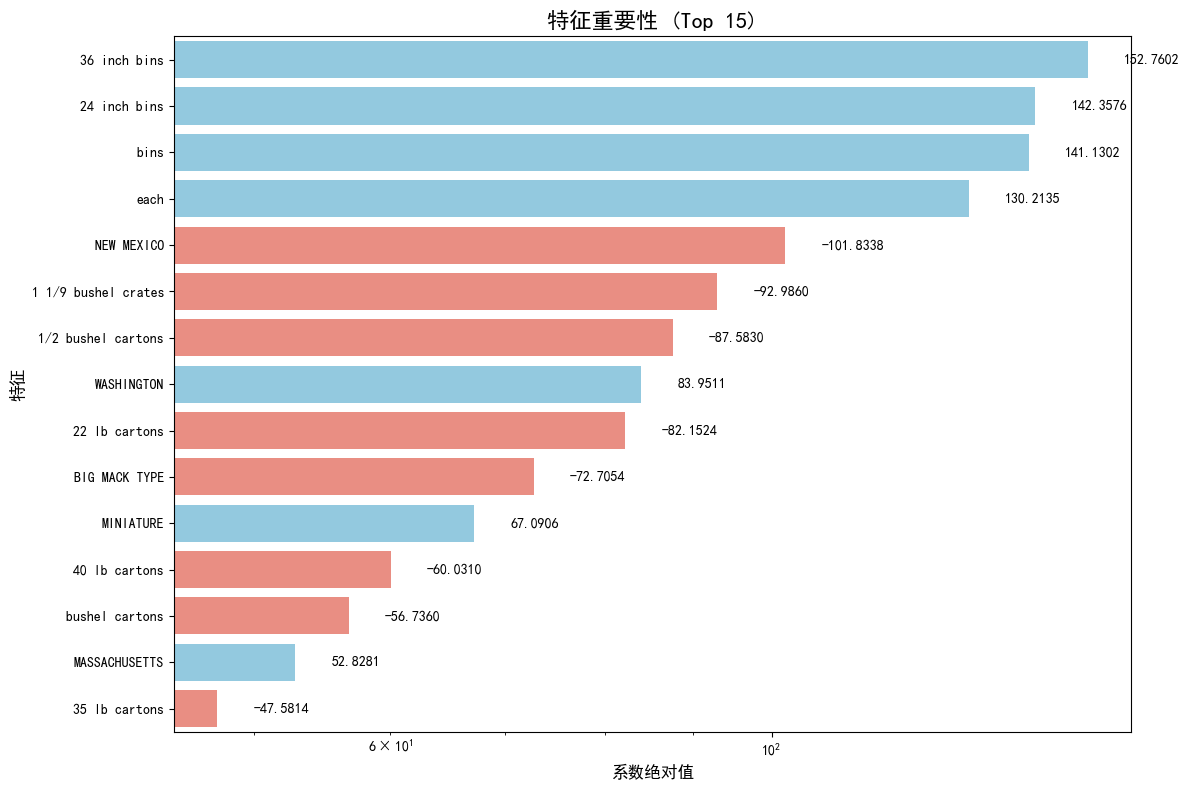

In [ ]:
# 10.1 多元线性回归实践

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 整合多个因子（使用南瓜种类、销售日期、销售地区、称量单位四个一阶特征拟合南瓜价格）
X = pd.get_dummies(new_pumpkins['Variety']).join(new_pumpkins['DayOfYear']).join(pd.get_dummies(new_pumpkins['Origin'])).join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# 训练模型
lr = LinearRegression()
lr.fit(X_train, y_train)
# 在测试集上预测
y_pred = lr.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)     
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)       


# 创建特征重要性DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_,
    'Absolute_Coefficient': np.abs(lr.coef_)
})
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# 可视化特征重要性 (水平条形图)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['skyblue' if c > 0 else 'salmon' for c in top_features['Coefficient']]
sns.barplot(x='Absolute_Coefficient', y='Feature', data=top_features, palette=colors)
plt.title('特征重要性 (Top 15)', fontsize=16)
plt.xlabel('系数绝对值', fontsize=12)
plt.ylabel('特征', fontsize=12)
plt.xscale('log')  # 使用对数刻度更好显示不同数量级

# 添加系数值标签
for i, (coef, abs_coef) in enumerate(zip(top_features['Coefficient'], top_features['Absolute_Coefficient'])):
    plt.text(abs_coef * 1.05, i, f'{coef:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()